# Exercise 1

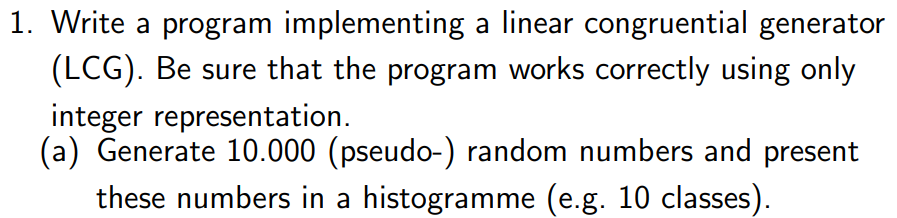

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import chisquare, kstest
from statsmodels.sandbox.stats.runs import runstest_1samp

def LCG(a, c, M, x0, n=10000):
    if not all(isinstance(i, int) for i in [a, c, M, x0]):
        print("Not integer values given")
        return None
    x = [x0]
    for _ in range(n - 1):
        x_next = (a * x[-1] + c) % M
        x.append(x_next)
    return x

values = LCG(5, 1, 10000, 3)
values

[3,
 16,
 81,
 406,
 2031,
 156,
 781,
 3906,
 9531,
 7656,
 8281,
 1406,
 7031,
 5156,
 5781,
 8906,
 4531,
 2656,
 3281,
 6406,
 2031,
 156,
 781,
 3906,
 9531,
 7656,
 8281,
 1406,
 7031,
 5156,
 5781,
 8906,
 4531,
 2656,
 3281,
 6406,
 2031,
 156,
 781,
 3906,
 9531,
 7656,
 8281,
 1406,
 7031,
 5156,
 5781,
 8906,
 4531,
 2656,
 3281,
 6406,
 2031,
 156,
 781,
 3906,
 9531,
 7656,
 8281,
 1406,
 7031,
 5156,
 5781,
 8906,
 4531,
 2656,
 3281,
 6406,
 2031,
 156,
 781,
 3906,
 9531,
 7656,
 8281,
 1406,
 7031,
 5156,
 5781,
 8906,
 4531,
 2656,
 3281,
 6406,
 2031,
 156,
 781,
 3906,
 9531,
 7656,
 8281,
 1406,
 7031,
 5156,
 5781,
 8906,
 4531,
 2656,
 3281,
 6406,
 2031,
 156,
 781,
 3906,
 9531,
 7656,
 8281,
 1406,
 7031,
 5156,
 5781,
 8906,
 4531,
 2656,
 3281,
 6406,
 2031,
 156,
 781,
 3906,
 9531,
 7656,
 8281,
 1406,
 7031,
 5156,
 5781,
 8906,
 4531,
 2656,
 3281,
 6406,
 2031,
 156,
 781,
 3906,
 9531,
 7656,
 8281,
 1406,
 7031,
 5156,
 5781,
 8906,
 4531,
 2656,
 328

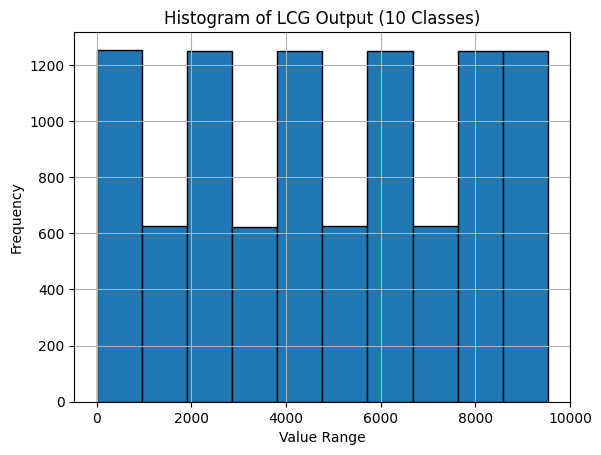

In [3]:
plt.hist(values, bins=10, edgecolor='black')
plt.title("Histogram of LCG Output (10 Classes)")
plt.xlabel("Value Range")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

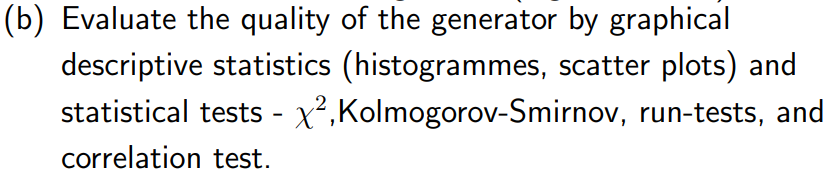

To visually evaluate the LCG and its generated numbers, we construct a scatter plot of normalized values $U[i]$ against $U[i+1]$. This helps reveal any potential patterns or correlations between consecutive numbers, which would indicate poor randomness.

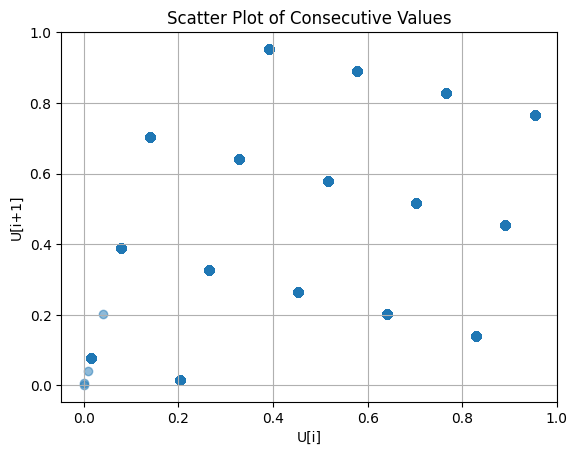

In [4]:
norm_values = np.array(values) / 10000

plt.scatter(norm_values[:-1], norm_values[1:], alpha=0.5)
plt.title("Scatter Plot of Consecutive Values")
plt.xlabel("U[i]")
plt.ylabel("U[i+1]")
plt.grid(True)
plt.show()



This shows a reasonably uniform spread of points across the unit square.

To assess whether the values generated by the LCG are uniformly distributed, a chi-square goodness-of-fit test is done. Here, 10 classes is used.

In [5]:
num_bins = 10
observed_counts, _ = np.histogram(values, bins=num_bins)
expected_counts = np.full(num_bins, len(values) / num_bins)
T = sum((obs - exp)**2 / exp for obs, exp in zip(observed_counts, expected_counts))
chi2_stat, p_val_chi2 = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"Chi-square T = {T:.4f}, p-value = {p_val_chi2:.10f}")

Chi-square T = 938.7700, p-value = 0.0000000000


Here, we see the p-value is far below the 0.05 threshhold, meaning the null hypothesis can be discarded of an uniform distribution. Thus, the numbers from the LFG deviate from what would be expected from an Uniform distribution.

To further evaluate the uniformity of the numbers, the Kolmogorov-Smirnov test is also applied:

In [6]:
ks_stat, p_val_ks = kstest(norm_values, 'uniform')
print(f"KS statistic = {ks_stat:.4f}, p-value = {p_val_ks:.10f}")

KS statistic = 0.0473, p-value = 0.0000000000


Since the p-value is effectively zero, we reject the null hypothesis that the LCG-generated values follow a uniform distribution. Thus, the LCG does not produce values that are uniformly distributed with the current parameter choice.

Now, a run test is done, as to assess if the sequence of values generated by the LCG has an abnormal amount of runs, suggesting if there is or is not randomness in the number sequence.

In [7]:
median = np.median(norm_values)
binary_seq = np.where(norm_values > median, 1, 0)
z_stat, p_val_run = runstest_1samp(binary_seq)
print(f"Run test z = {z_stat:.4f}, p-value = {p_val_run:.4f}")

Run test z = -25.0613, p-value = 0.0000


Again, this provides strong evidence against the null hypothesis of randomness, meaning the generated number sequence exhibits a non-random structure. 

To check whether the generated values are independent of each other, we calculate the lag-1 correlation - the correlation between $U[i]$ and $U[i+1]$:

In [8]:
u1 = norm_values[:-1]
u2 = norm_values[1:]
correlation = np.corrcoef(u1, u2)[0, 1]
print(f"Lag-1 correlation = {correlation:.4f}")

Lag-1 correlation = 0.2714


A correlation of 0.27 suggests a moderate positve correlation between consecutive values. This suggests that the generator introduces some sort of dependence between successive outputs, which is not ideal for a random number generator.

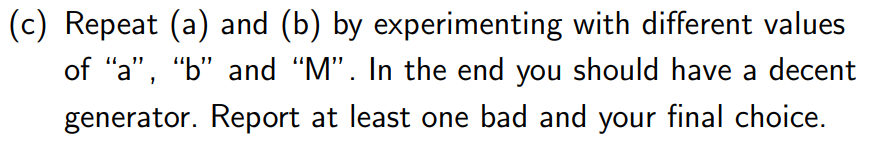

To identify a good combination of parameters $a$, $b$, and $M$ for the LCG, multiple configurations are now evaluated, testing them for uniformity and randomness. Here, a good choice is presented:

In [9]:
test1 = LCG(1, 0, 10000, 1)
test1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


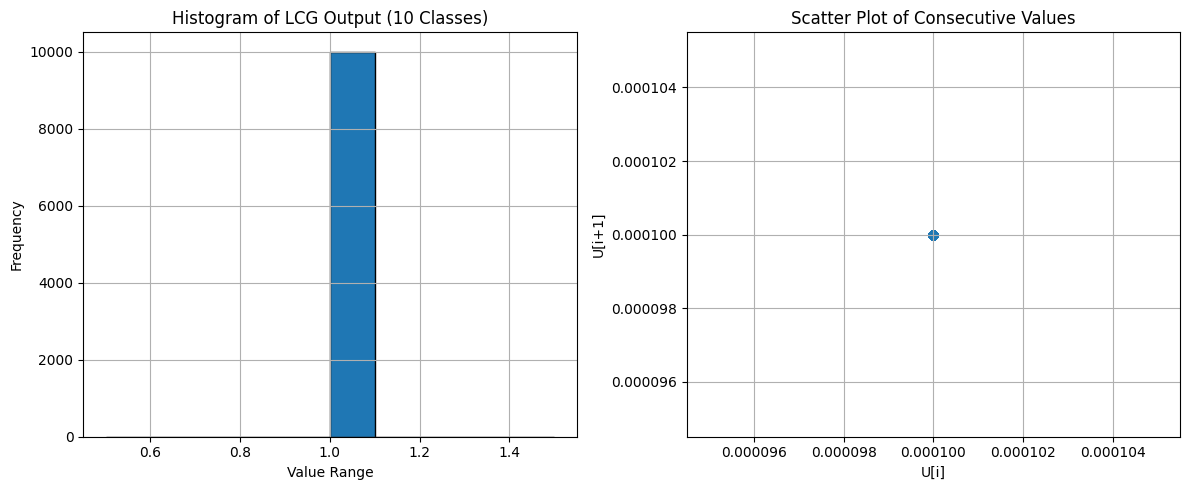

In [10]:
norm_values = np.array(test1) / 10000

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Histogram
axs[0].hist(test1, bins=10, edgecolor='black')
axs[0].set_title("Histogram of LCG Output (10 Classes)")
axs[0].set_xlabel("Value Range")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)

# Scatter plot
axs[1].scatter(norm_values[:-1], norm_values[1:], alpha=0.5)
axs[1].set_title("Scatter Plot of Consecutive Values")
axs[1].set_xlabel("U[i]")
axs[1].set_ylabel("U[i+1]")
axs[1].grid(True)

plt.tight_layout()
plt.show()

The histogram shows only one bar, meaning all 10,000 values are the same (as can also be seen from the print earlier). Furthermore, every point in the scatterplot is in the same location, indicating no randomness.

Just from observing these two plots, it can be concluded that this configuration is a despicable choice if randomness was desired.

Moving on to the good case:

In [11]:
test2 = LCG(16807, 0, 2**31 - 1, 1, n=10000)
test2

[1,
 16807,
 282475249,
 1622650073,
 984943658,
 1144108930,
 470211272,
 101027544,
 1457850878,
 1458777923,
 2007237709,
 823564440,
 1115438165,
 1784484492,
 74243042,
 114807987,
 1137522503,
 1441282327,
 16531729,
 823378840,
 143542612,
 896544303,
 1474833169,
 1264817709,
 1998097157,
 1817129560,
 1131570933,
 197493099,
 1404280278,
 893351816,
 1505795335,
 1954899097,
 1636807826,
 563613512,
 101929267,
 1580723810,
 704877633,
 1358580979,
 1624379149,
 2128236579,
 784558821,
 530511967,
 2110010672,
 1551901393,
 1617819336,
 1399125485,
 156091745,
 1356425228,
 1899894091,
 585640194,
 937186357,
 1646035001,
 1025921153,
 510616708,
 590357944,
 771515668,
 357571490,
 1044788124,
 1927702196,
 1952509530,
 130060903,
 1942727722,
 1083454666,
 1108728549,
 685118024,
 2118797801,
 1060806853,
 571540977,
 194847408,
 2035308228,
 158374933,
 1075260298,
 824938981,
 595028635,
 1962408013,
 1137623865,
 997389814,
 2020739063,
 107554536,
 1635339425,
 165400166

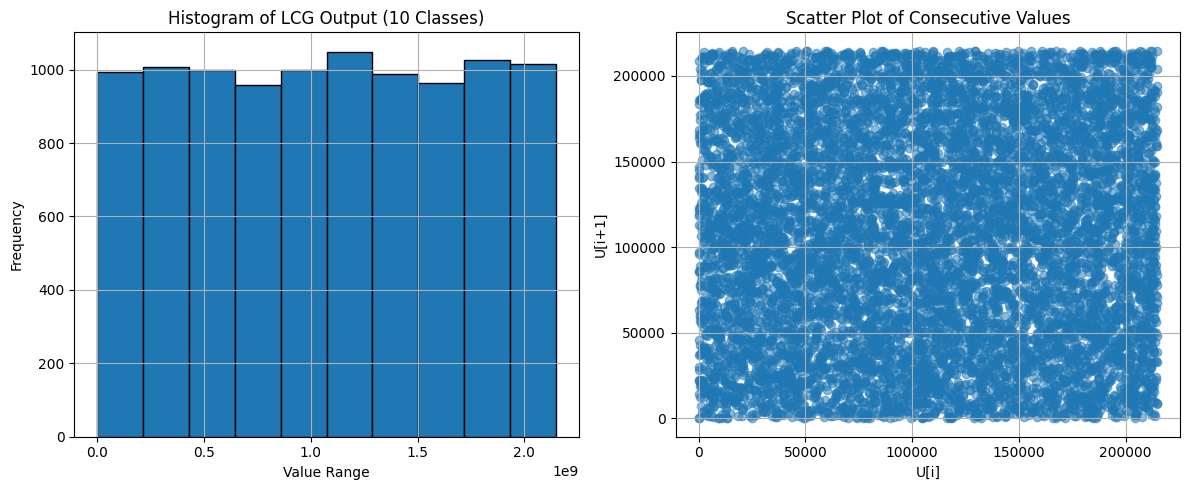

In [12]:
norm_values = np.array(test2) / 10000

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Histogram
axs[0].hist(test2, bins=10, edgecolor='black')
axs[0].set_title("Histogram of LCG Output (10 Classes)")
axs[0].set_xlabel("Value Range")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)

# Scatter plot
axs[1].scatter(norm_values[:-1], norm_values[1:], alpha=0.5)
axs[1].set_title("Scatter Plot of Consecutive Values")
axs[1].set_xlabel("U[i]")
axs[1].set_ylabel("U[i+1]")
axs[1].grid(True)

plt.tight_layout()
plt.show()

Here, the histogram shows that the values are evenly distributed. Additionally, the scatter plot indicate no visible patterns.

Now for the tests:

In [13]:
num_bins = 10
observed_counts, _ = np.histogram(values, bins=num_bins)
expected_counts = np.full(num_bins, len(values) / num_bins)
T = sum((obs - exp)**2 / exp for obs, exp in zip(observed_counts, expected_counts))
chi2_stat, p_val_chi2 = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"Chi-square T = {T:.4f}, p-value = {p_val_chi2:.10f}")

ks_stat, p_val_ks = kstest(norm_values, 'uniform')
print(f"KS statistic = {ks_stat:.4f}, p-value = {p_val_ks:.10f}")

median = np.median(norm_values)
binary_seq = np.where(norm_values > median, 1, 0)
z_stat, p_val_run = runstest_1samp(binary_seq)
print(f"Run test z = {z_stat:.4f}, p-value = {p_val_run:.4f}")

u1 = norm_values[:-1]
u2 = norm_values[1:]
correlation = np.corrcoef(u1, u2)[0, 1]
print(f"Lag-1 correlation = {correlation:.4f}")

Chi-square T = 938.7700, p-value = 0.0000000000
KS statistic = 0.9998, p-value = 0.0000000000
Run test z = -1.1801, p-value = 0.2380
Lag-1 correlation = -0.0002


The chi-square test indicates a p-value near zero, suggesting a significant deviation from uniformity. The Kolmogorov–Smirnov test similarly produces a near-maximal statistic with a p-value of 0, strongly rejecting the hypothesis of a uniform distribution. In contrast, the run test shows no significant deviation from randomness, with a p-value of 0.238, suggesting the values are independently ordered. The lag-1 correlation is -0.0002, which is effectively zero and confirms the absence of correlation between consecutive values.

Overall, the generator appears to produce random, independent values, but fails to distribute them uniformly across the expected range.

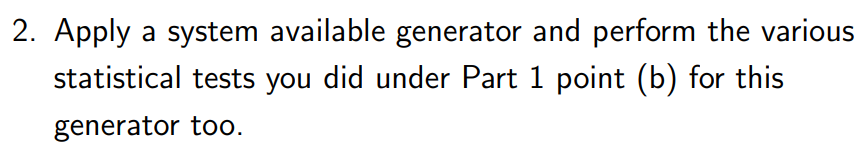

Here, 10000 values are generated using NumPy’s built-in random number generator and evaluated for statistical quality.

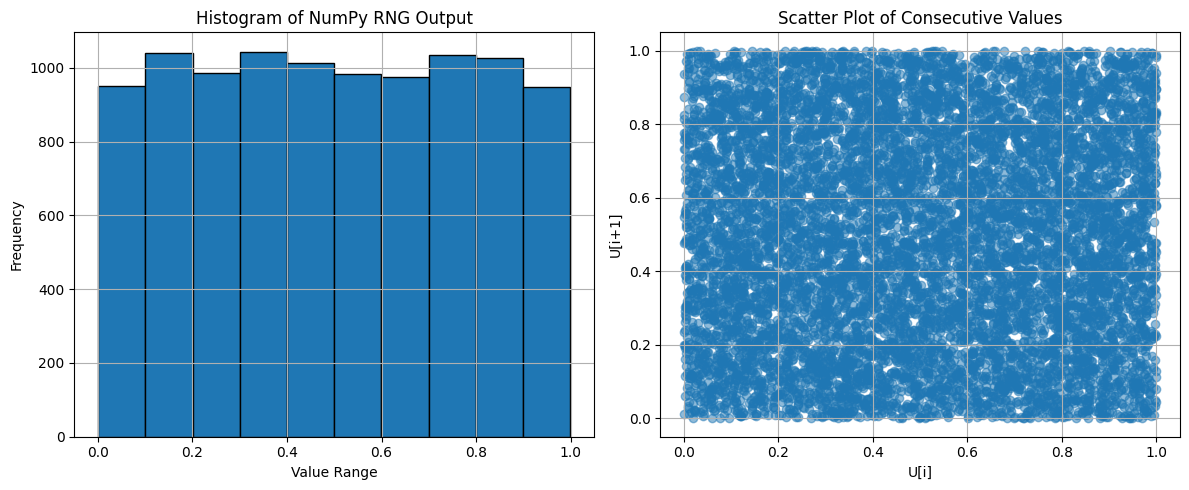

Chi-square T = 11.7080, p-value = 0.2302758608
KS statistic = 0.0060, p-value = 0.8684057637
Run test z   = -0.8200, p-value = 0.4122
Lag-1 correlation = 0.0017


In [17]:
values = np.random.uniform(0, 1, 10000)
norm_values = values  

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(norm_values, bins=10, edgecolor='black')
axs[0].set_title("Histogram of NumPy RNG Output")
axs[0].set_xlabel("Value Range")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)

axs[1].scatter(norm_values[:-1], norm_values[1:], alpha=0.5)
axs[1].set_title("Scatter Plot of Consecutive Values")
axs[1].set_xlabel("U[i]")
axs[1].set_ylabel("U[i+1]")
axs[1].grid(True)

plt.tight_layout()
plt.show()

num_bins = 10
observed_counts, _ = np.histogram(norm_values, bins=num_bins)
expected_counts = np.full(num_bins, len(norm_values) / num_bins)
T = sum((obs - exp)**2 / exp for obs, exp in zip(observed_counts, expected_counts))
chi2_stat, p_val_chi2 = chisquare(f_obs=observed_counts, f_exp=expected_counts)
ks_stat, p_val_ks = kstest(norm_values, 'uniform')
median = np.median(norm_values)
binary_seq = np.where(norm_values > median, 1, 0)
z_stat, p_val_run = runstest_1samp(binary_seq)
u1 = norm_values[:-1]
u2 = norm_values[1:]
correlation = np.corrcoef(u1, u2)[0, 1]

print(f"Chi-square T = {T:.4f}, p-value = {p_val_chi2:.10f}")
print(f"KS statistic = {ks_stat:.4f}, p-value = {p_val_ks:.10f}")
print(f"Run test z   = {z_stat:.4f}, p-value = {p_val_run:.4f}")
print(f"Lag-1 correlation = {correlation:.4f}")

The histogram shows an even distribution, indicating good uniformity, while the scatter plot reveals no visible patterns, suggesting independence.

The Chi-square shows a p-value ... and the KS p-value shows...

The run test shows...

The lag-1 correlation shows.

Despite this, the overall results show...

It is therefore considered suitable for use in simulation and statistical applications.

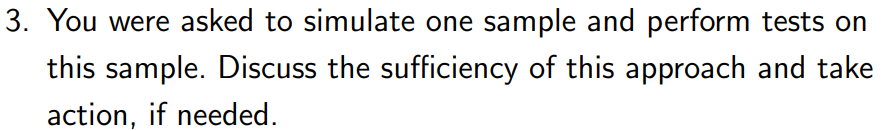

I think testing just one sample can give a general idea of how good the generator is, but it’s probably not enough on its own. Since random variation can affect the outcome, a single test might not reflect the generator’s actual behavior. To be more confident, I tried generating and testing multiple samples. The results were consistent across runs which made me feel more sure that the generator is performing reliably and that the earlier results were not just "random" strokes of luck.